In [1]:
import pandas as pd

# Definir las rutas a los archivos CSV
rutas_archivos = [
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\datos_extraidoselespectador_descriptivo.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\datos_extraidoslas2orillas_descriptivo.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\datos_extraidosportafolio_descriptivo.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\datos_extraidossemana_descriptivo.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\datos_extraidoslarepublica_descriptivo.csv"
]

# Lista para almacenar los DataFrames
dataframes = []

# Leer cada archivo CSV y agregarlo a la lista
for ruta in rutas_archivos:
    df = pd.read_csv(ruta, encoding='utf-8-sig')  # Leer el archivo CSV
    dataframes.append(df)  # Agregar el DataFrame a la lista

# Concatenar todos los DataFrames en uno solo
df_concatenado = pd.concat(dataframes, ignore_index=True)

# Convertir la columna "Fecha de Publicación" a tipo datetime, forzando UTC
df_concatenado['Fecha de Publicación'] = pd.to_datetime(df_concatenado['Fecha de Publicación'], errors='coerce', utc=True)

# Convertir a una zona horaria específica, por ejemplo, 'America/Bogota'
df_concatenado['Fecha de Publicación'] = df_concatenado['Fecha de Publicación'].dt.tz_convert('America/Bogota')

# Verificar cuántas fechas no se pudieron convertir
fechas_no_convertidas = df_concatenado[df_concatenado['Fecha de Publicación'].isna()]
print(fechas_no_convertidas)

# Guardar el DataFrame concatenado en un nuevo archivo CSV
df_concatenado.to_csv("C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\datos_combinados_PAZ.csv", index=False, encoding='utf-8-sig')


Empty DataFrame
Columns: [Autor, Fecha de Publicación, Número de Palabras, Nombre del Periódico]
Index: []


In [11]:
df_concatenado

,Autor,Fecha de Publicación,Número de Palabras,Nombre del Periódico
0,Gloria Arias Nieto,2023-12-04 21:00:00-05:00,638,El espectador
1,El Espectador,2023-12-03 21:00:00-05:00,585,El espectador
2,Cristina de la Torre,2023-11-27 21:05:00-05:00,597,El espectador
3,Daniel García-Peña,2023-11-27 21:00:00-05:00,1873,El espectador
4,El Espectador,2023-11-23 21:00:00-05:00,586,El espectador
...,...,...,...,...
89,Juan Fernando Samudio,2023-04-25 19:00:00-05:00,566,La republica
90,Alfredo Sarmiento Narváez,2023-04-21 19:00:00-05:00,511,La republica
91,Luis Felipe Gómez Restrepo,2023-03-06 19:00:00-05:00,608,La republica
92,Carlos Ronderos,2023-02-27 19:00:00-05:00,595,La republica


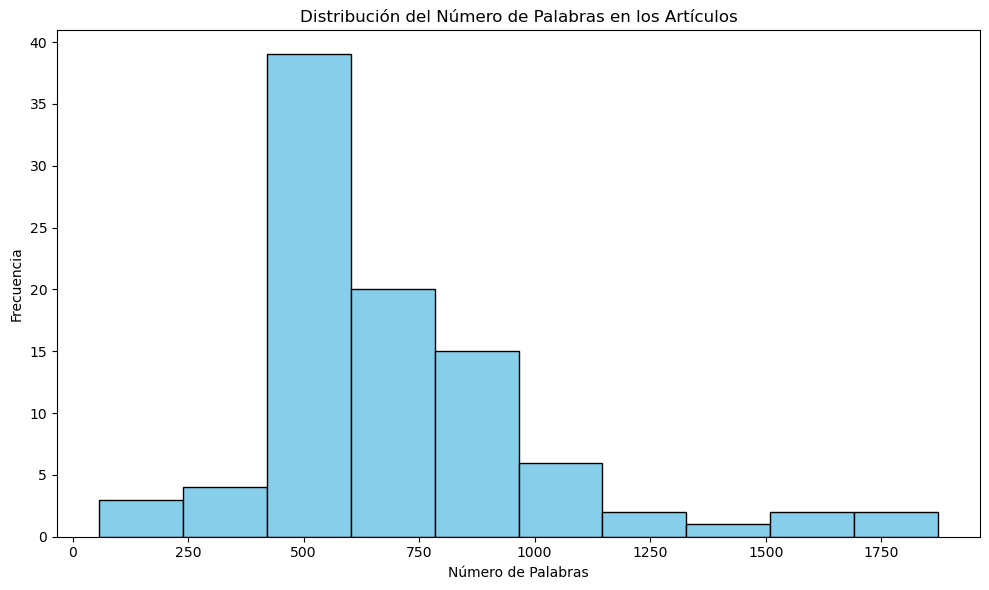

In [12]:
import matplotlib.pyplot as plt

# Gráfica 1: Distribución del Número de Palabras
plt.figure(figsize=(10, 6))
plt.hist(df_concatenado['Número de Palabras'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Palabras en los Artículos')
plt.tight_layout()
plt.show()

In [20]:
# Análisis descriptivo
print("\nAnálisis descriptivo:")
print(df_concatenado.describe())


Análisis descriptivo:
       Número de Palabras
count           94.000000
mean           687.265957
std            312.330889
min             57.000000
25%            486.250000
50%            606.500000
75%            809.750000
max           1873.000000


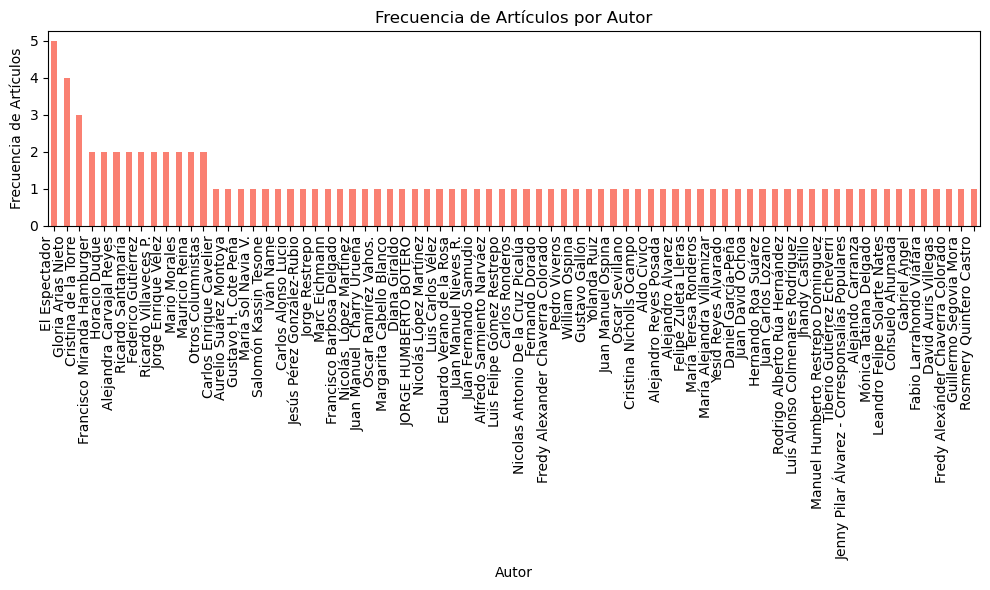

In [14]:
# Gráfica 2: Frecuencia de artículos por autor
plt.figure(figsize=(10, 6))
df_concatenado['Autor'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Autor')
plt.ylabel('Frecuencia de Artículos')
plt.title('Frecuencia de Artículos por Autor')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

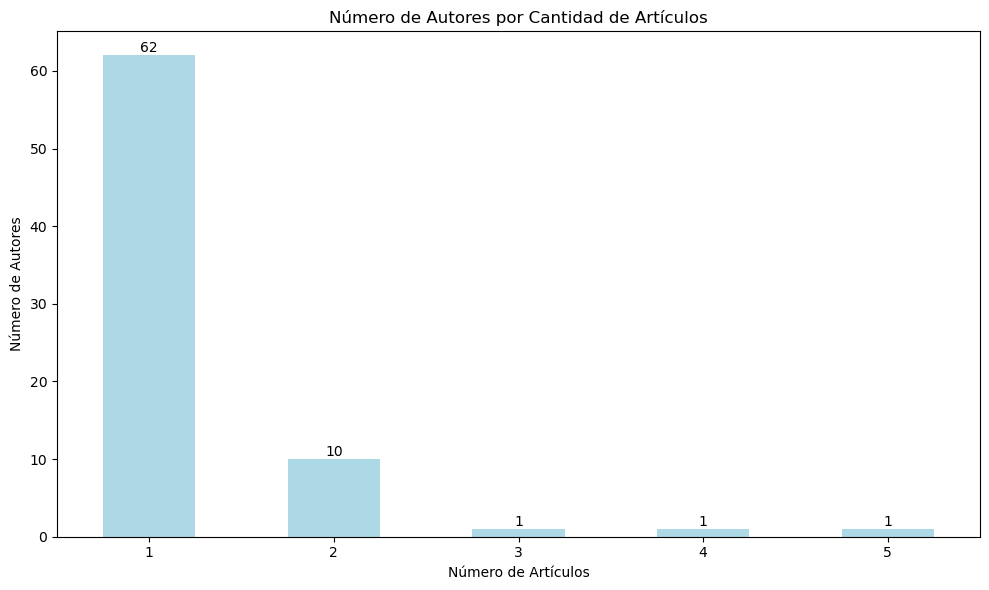

In [19]:
# Contar cuántos artículos tiene cada autor
frecuencia_autores = df_concatenado['Autor'].value_counts()

# Contar cuántos autores tienen 1, 2, 3, etc. artículos
conteo_autores_por_articulos = frecuencia_autores.value_counts().sort_index()

plt.figure(figsize=(10, 6))
conteo_autores_por_articulos.plot(kind='bar', color='lightblue')
plt.xlabel('Número de Artículos')
plt.ylabel('Número de Autores')
plt.title('Número de Autores por Cantidad de Artículos')
plt.xticks(rotation=0)
plt.tight_layout()

# Agregar los números sobre las barras
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.show()


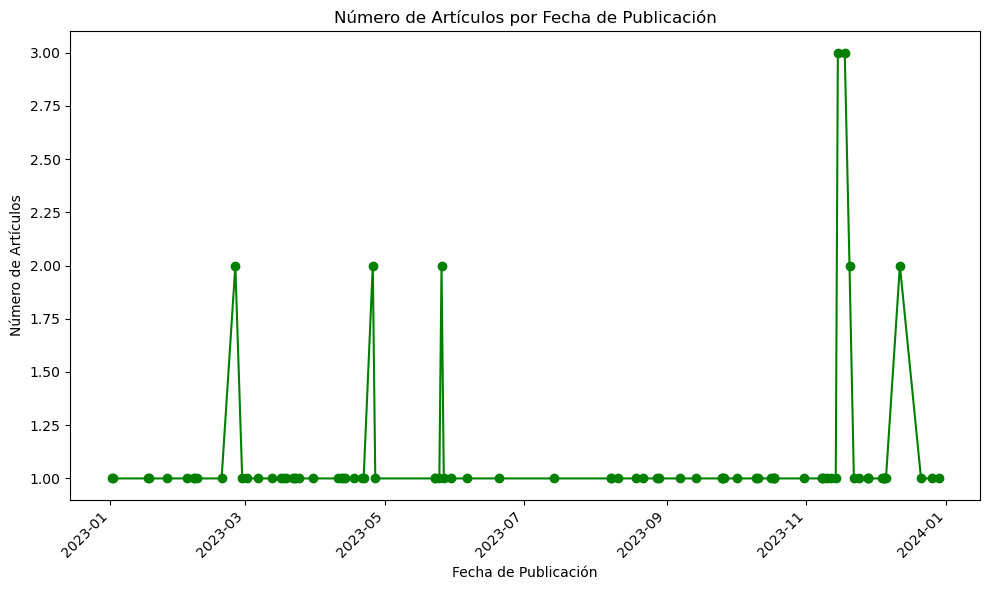

In [15]:
# Gráfica 3: Artículos por Fecha de Publicación
plt.figure(figsize=(10, 6))
df_concatenado['Fecha de Publicación'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-', color='green')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Fecha de Publicación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9604\1069206901.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  articulos_por_mes = df_concatenado.groupby(df_concatenado['Fecha de Publicación'].dt.to_period('M')).size()


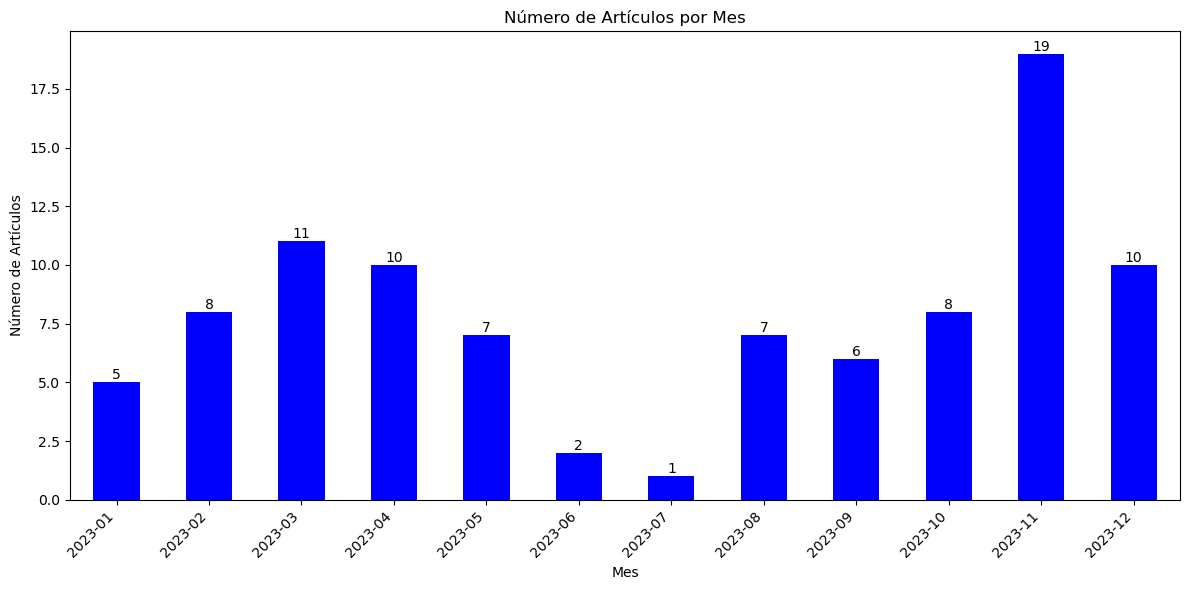

In [18]:
# Agrupar por mes y contar los artículos
articulos_por_mes = df_concatenado.groupby(df_concatenado['Fecha de Publicación'].dt.to_period('M')).size()

# Convertir el índice de Periodo a cadena para la gráfica
articulos_por_mes.index = articulos_por_mes.index.astype(str)

plt.figure(figsize=(12, 6))
ax = articulos_por_mes.plot(kind='bar', color='blue')
plt.xlabel('Mes')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Mes')
plt.xticks(rotation=45, ha='right')

# Agregar los números sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()



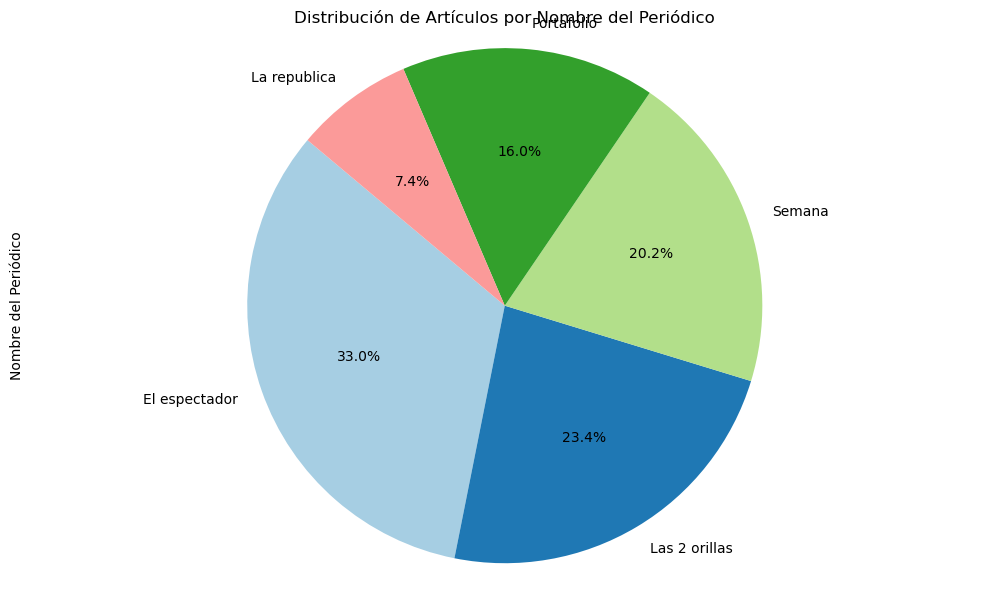

In [17]:
import matplotlib.pyplot as plt

# Gráfica de Torta: Distribución de Artículos por Nombre del Periódico
plt.figure(figsize=(10, 6))
df_concatenado['Nombre del Periódico'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribución de Artículos por Nombre del Periódico')
plt.axis('equal')  
plt.tight_layout()
plt.show()
